## Step 1: Import Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## Step 2: Load the Dataset & Convert to DataFrame

In [8]:
# Load the iris dataset from sklearn 
iris = load_iris()

# Convert to DataFrame for easier analysis
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Mapping target numbers to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 3: Exploratory Data Analysis(EDA)

### A. Check Dataset info + nulls:

In [9]:
# shape and basic info
print("Shape:", df.shape)
print("\nDataset Info:\n")
df.info()

# Check for missing values
print("\nMissing values:\n")
print(df.isnull().sum())

Shape: (150, 5)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing values:

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


### B. Basic Statistics

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### C. Visualization

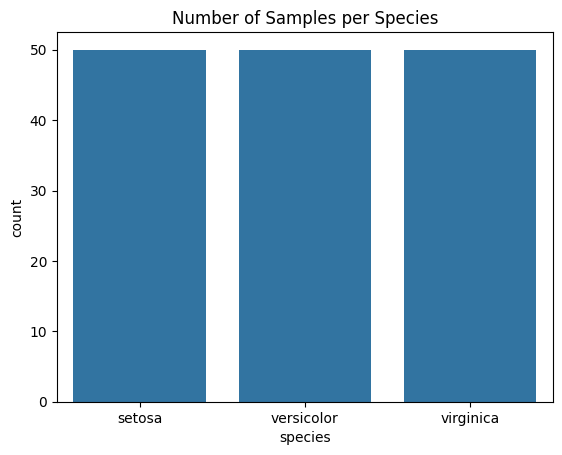

In [11]:
# 1. Count of Each Species:
sns.countplot(x='species', data=df)
plt.title("Number of Samples per Species")
plt.show()

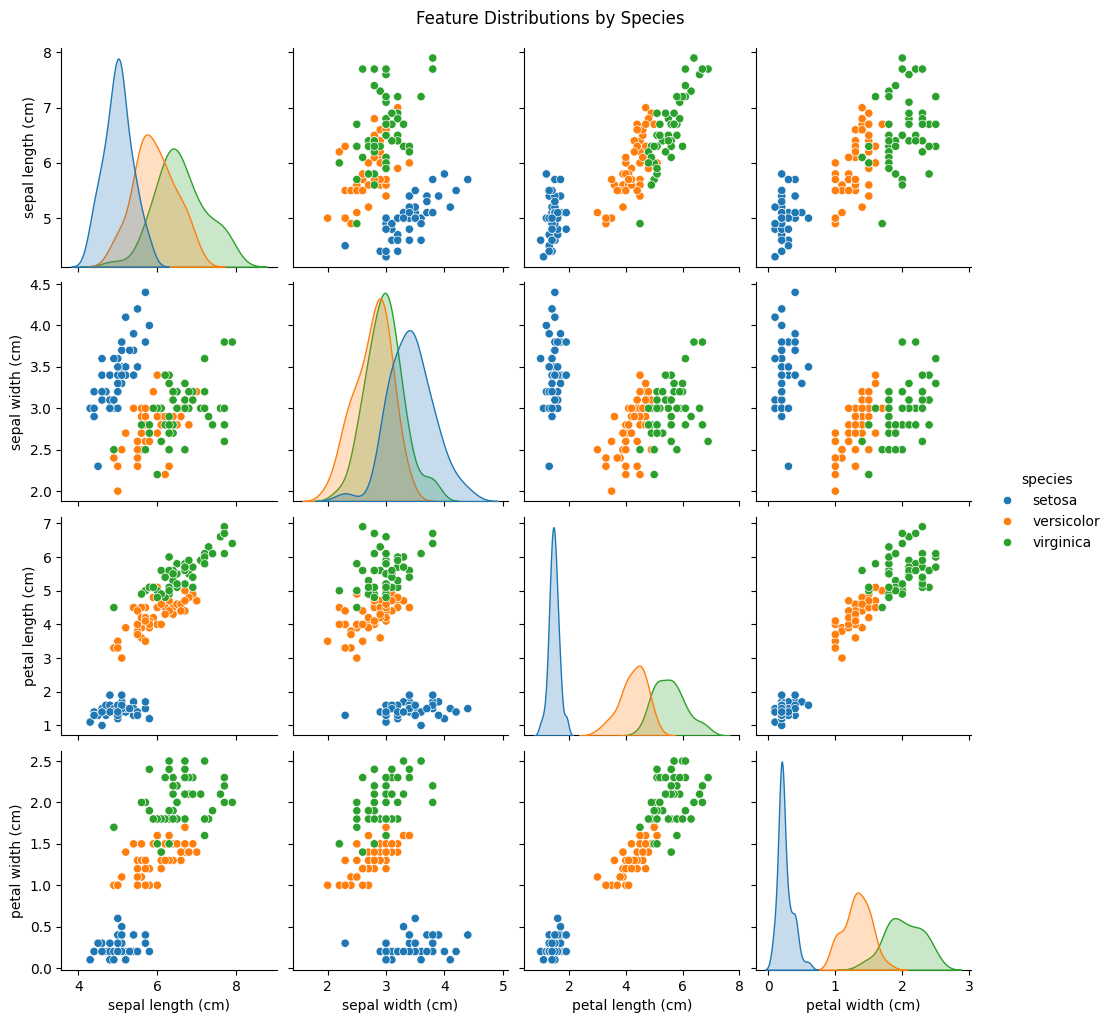

In [12]:
# 2. Pairplot of all features:
sns.pairplot(df, hue='species')
plt.suptitle("Feature Distributions by Species", y=1.02)
plt.show()

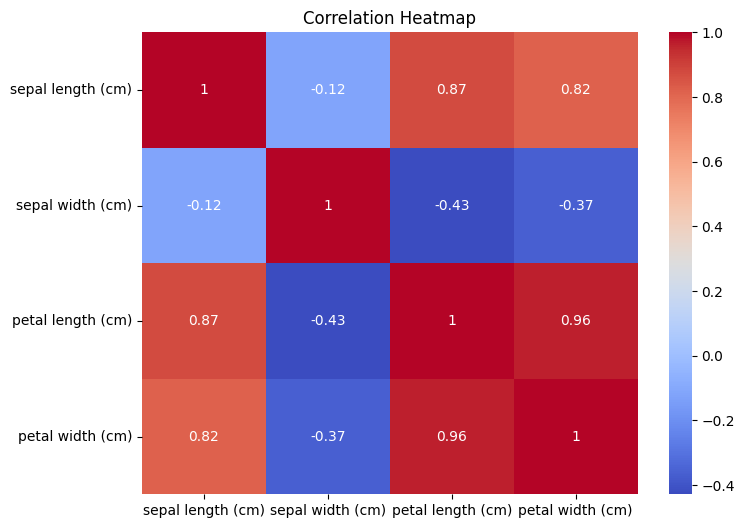

In [15]:
# 3. Correlation heatmap(excluding 'species' column):
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Step 4: Preprocessing + Train/Test Split
    In this Step, we'll:
        1. Split the data into features & target(X and y)
        2. Train/test split
        3. Scale the features using StandardScaler

In [17]:
# Splitting and Scaling 

# A. Split data into features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# B. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# C. Feature Scaling (important for SVM, KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 5: Model Building & Evaluation
    We’ll now:
        3. Train SVM, KNN, and Decision Tree models
        2. Evaluate each using accuracy and classification report

### A. Support Vector Machine(SVM)

In [18]:
# Step 5A: Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)

print("🔹SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))

🔹SVM Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### B. K-Nearest Neighbors (KNN)

In [19]:
# Step 5B: K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_preds = knn_model.predict(X_test)

print("🔹KNN Results:")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Classification Reports:\n", classification_report(y_test, knn_preds))

🔹KNN Results:
Accuracy: 1.0
Classification Reports:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### C. Decision Tree Classifier

In [20]:
# Step 5C: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)

print("🔹Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))

🔹Decision Tree Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 📌 Project Summary: Iris Species Classification 🌸
This project uses the Iris flower dataset to build a machine learning model that predicts the species of an iris flower based on four features:

Sepal Length

Sepal Width

Petal Length

Petal Width

### ✅ Steps Followed:
- Imported the dataset using scikit-learn

- Explored the data using Pandas and Seaborn (EDA)

- Visualized patterns using pairplots and heatmaps

- Preprocessed the dataset (split & scaled)

- Trained and tested three ML models:

    - Support Vector Machine (SVM)

    - K-Nearest Neighbors (KNN)

    - Decision Tree Classifier

- Evaluated models using accuracy and classification report

### 📊 Model Performance:
SVM and KNN typically perform the best on this dataset.

Accuracy often ranges from 95% to 100%.

### 📁 Tools Used:
- Python, Jupyter Notebook

- Pandas, Numpy, Seaborn, Matplotlib

- Scikit-learn (sklearn)